# Explore House Sales Data

Let's explore the house sales data.

## Read and Display data

In [1]:
import os
import urllib.request

data_location = "../data/house-prices/house-sales-simplified.csv"
data_url =  'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-simplified.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        urllib.request.urlretrieve(data_url, data_location)
        print ('Downloading : ', data_url)
print('data_location :', data_location)  


data_location : house-sales-simplified.csv


In [2]:
import numpy as np
import pandas as pd

house_prices = pd.read_csv(data_location)
house_prices

,ID,Date,SalePrice,PropertyID,PropertyType,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
0,1,9/16/14,280000,1000102,Multiplex,6,3.00,2400,9373,1991,98002
1,2,6/16/06,1000000,1200013,Single Family,4,3.75,3764,20156,2005,98166
2,3,1/29/07,745000,1200019,Single Family,4,1.75,2060,26036,1947,98166
3,4,2/25/08,425000,2800016,Single Family,5,3.75,3200,8618,1966,98168
4,5,3/29/13,240000,2800024,Single Family,4,1.75,1720,8620,1948,98168
...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,2,1.75,1410,1161,2011,-1
27059,27060,12/7/12,374000,9895000040,Townhouse,2,1.75,1410,1005,2011,-1
27060,27061,7/9/12,165000,9899200010,Single Family,4,1.00,1070,11170,1971,98055
27061,27062,5/26/06,315000,9900000355,Single Family,3,2.00,1345,6223,1939,98166


## 'Summary' of data

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
house_prices.describe()

,ID,SalePrice,PropertyID,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
count,"27,063.00","27,063.00","27,063.00","27,063.00","27,063.00","27,063.00","27,063.00","27,063.00","27,063.00"
mean,"13,532.00","511,626.20","4,680,324,882.08",3.38,2.26,"2,122.96","10,997.68","1,977.09","82,223.04"
std,"7,812.56","342,821.17","2,896,350,979.15",0.90,0.77,939.84,"28,110.66",30.92,"36,106.67"
min,1.00,"3,000.00","1,000,102.00",0.00,0.00,370.00,494.00,"1,900.00",-1.00
25%,"6,766.50","329,000.00","2,213,000,057.50",3.00,1.75,"1,440.00","4,257.50","1,954.00","98,019.00"
50%,"13,532.00","425,000.00","3,972,900,140.00",3.00,2.50,"1,940.00","6,636.00","1,986.00","98,053.00"
75%,"20,297.50","590,000.00","7,504,001,385.00",4.00,2.50,"2,610.00","9,450.00","2,006.00","98,115.00"
max,"27,063.00","11,000,000.00","9,906,000,035.00",33.00,8.00,"10,740.00","1,024,068.00","2,016.00","98,354.00"


## Get an idea of one attribute

In [4]:
house_prices[["SalePrice"]].describe()

,SalePrice
count,"27,063.00"
mean,"511,626.20"
std,"342,821.17"
min,"3,000.00"
25%,"329,000.00"
50%,"425,000.00"
75%,"590,000.00"
max,"11,000,000.00"


## Report on Bedrooms vs Sales
Let's calculte sales per bedrooms

In [5]:
## Hint : 'Bedrooms'
bedroom_sales = house_prices.groupby("Bedrooms").size()
bedroom_sales

Bedrooms
0        12
1       164
2      3415
3     12074
4      9190
5      1872
6       275
7        41
8        10
9         5
11        3
13        1
33        1
dtype: int64

In [6]:
## TODO: order by count top to bottom
bedroom_sales.sort_values(ascending=False) 

Bedrooms
3     12074
4      9190
2      3415
5      1872
6       275
1       164
7        41
0        12
8        10
9         5
11        3
13        1
33        1
dtype: int64

## Filter Out Outliers
Let's remove entries with more than 6 bedrooms.

In [7]:
filtered = house_prices.loc [house_prices['Bedrooms'] < 6]
print ('total records : ', house_prices.shape)
print ('filtered records :', filtered.shape)
filtered

total records :  (27063, 11)
filtered records : (26727, 11)


,ID,Date,SalePrice,PropertyID,PropertyType,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
1,2,6/16/06,1000000,1200013,Single Family,4,3.75,3764,20156,2005,98166
2,3,1/29/07,745000,1200019,Single Family,4,1.75,2060,26036,1947,98166
3,4,2/25/08,425000,2800016,Single Family,5,3.75,3200,8618,1966,98168
4,5,3/29/13,240000,2800024,Single Family,4,1.75,1720,8620,1948,98168
5,6,3/30/09,349900,3600090,Townhouse,2,1.50,930,1012,2008,98144
...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,2,1.75,1410,1161,2011,-1
27059,27060,12/7/12,374000,9895000040,Townhouse,2,1.75,1410,1005,2011,-1
27060,27061,7/9/12,165000,9899200010,Single Family,4,1.00,1070,11170,1971,98055
27061,27062,5/26/06,315000,9900000355,Single Family,3,2.00,1345,6223,1939,98166


In [8]:
## TODO : Filter houses under 5 bedrooms and less than 3 bathrooms

filtered2 = house_prices.loc  [ (house_prices['Bedrooms'] < 5) &
                                (house_prices['Bathrooms'] < 3)]
filtered2

,ID,Date,SalePrice,PropertyID,PropertyType,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
2,3,1/29/07,745000,1200019,Single Family,4,1.75,2060,26036,1947,98166
4,5,3/29/13,240000,2800024,Single Family,4,1.75,1720,8620,1948,98168
5,6,3/30/09,349900,3600090,Townhouse,2,1.50,930,1012,2008,98144
6,7,8/28/13,327500,3800004,Single Family,3,1.50,1750,34465,1961,98178
7,8,5/24/07,347000,3800009,Single Family,4,1.75,1860,14659,1963,98178
...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,2,1.75,1410,1161,2011,-1
27059,27060,12/7/12,374000,9895000040,Townhouse,2,1.75,1410,1005,2011,-1
27060,27061,7/9/12,165000,9899200010,Single Family,4,1.00,1070,11170,1971,98055
27061,27062,5/26/06,315000,9900000355,Single Family,3,2.00,1345,6223,1939,98166


## Calculate some percentiles

In [9]:
percentiles = (0.25, 0.5, 0.75, 0.9, 0.95)
prices = house_prices['SalePrice'].quantile(percentiles)

print(percentiles)
print(prices)

# get a Pandas dataframe for pretty print
percentile_pricing_df = pd.DataFrame({"percentile": percentiles, "price": prices} )
percentile_pricing_df

(0.25, 0.5, 0.75, 0.9, 0.95)
0.25     329,000.00
0.50     425,000.00
0.75     590,000.00
0.90     820,000.00
0.95   1,050,000.00
Name: SalePrice, dtype: float64


,percentile,price
0.25,0.25,"329,000.00"
0.50,0.50,"425,000.00"
0.75,0.75,"590,000.00"
0.90,0.90,"820,000.00"
0.95,0.95,"1,050,000.00"


## Covariance & Correlation

Q1 : Calculate Covariance between "SalePrice"  and "Bedrooms"
    df.cov()

Q1 : Which attributes influences sale price more?  
- Number of Bedrooms ("Bedrooms")
- or size of the home ("SqFtTotLiving")

Hint : calculate Correlation  df.corr()

**Q=> Can you explain the result**

In [10]:
house_prices.cov() # Calculate covariance matrix

,ID,SalePrice,PropertyID,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
ID,"61,036,086.00","-62,046,914.57","22,475,781,167,721.75",-200.22,-35.94,"-127,609.86","-24,791,993.85","6,998.66","-2,124,951.17"
SalePrice,"-62,046,914.57","117,526,353,751.42","-24,050,782,905,289.84","98,160.81","136,415.69","219,922,946.05","1,368,812,439.89","826,490.19","-306,248,678.96"
PropertyID,"22,475,781,167,721.75","-24,050,782,905,289.84","8,388,848,994,424,043,520.00","-74,899,061.37","-12,273,104.84","-47,352,616,594.86","-8,872,675,166,959.14","2,679,067,924.56","-1,169,969,998,862.21"
Bedrooms,-200.22,"98,160.81","-74,899,061.37",0.80,0.37,520.38,"1,997.64",3.86,"-1,020.59"
Bathrooms,-35.94,"136,415.69","-12,273,104.84",0.37,0.59,543.42,"2,248.58",11.63,"-6,507.02"
SqFtTotLiving,"-127,609.86","219,922,946.05","-47,352,616,594.86",520.38,543.42,"883,298.24","5,475,706.26","8,603.14","-3,525,812.61"
SqFtLot,"-24,791,993.85","1,368,812,439.89","-8,872,675,166,959.14","1,997.64","2,248.58","5,475,706.26","790,209,318.60","27,066.11","61,392,253.22"
YrBuilt,"6,998.66","826,490.19","2,679,067,924.56",3.86,11.63,"8,603.14","27,066.11",956.14,"-485,120.93"
ZipCode,"-2,124,951.17","-306,248,678.96","-1,169,969,998,862.21","-1,020.59","-6,507.02","-3,525,812.61","61,392,253.22","-485,120.93","1,303,691,297.81"


In [11]:
corr = house_prices.corr()  # calculate correlation matrix
corr

,ID,SalePrice,PropertyID,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
ID,1.00,-0.02,0.99,-0.03,-0.01,-0.02,-0.11,0.03,-0.01
SalePrice,-0.02,1.00,-0.02,0.32,0.52,0.68,0.14,0.08,-0.02
PropertyID,0.99,-0.02,1.00,-0.03,-0.01,-0.02,-0.11,0.03,-0.01
Bedrooms,-0.03,0.32,-0.03,1.00,0.53,0.62,0.08,0.14,-0.03
Bathrooms,-0.01,0.52,-0.01,0.53,1.00,0.75,0.10,0.49,-0.23
SqFtTotLiving,-0.02,0.68,-0.02,0.62,0.75,1.00,0.21,0.30,-0.10
SqFtLot,-0.11,0.14,-0.11,0.08,0.10,0.21,1.00,0.03,0.06
YrBuilt,0.03,0.08,0.03,0.14,0.49,0.30,0.03,1.00,-0.43
ZipCode,-0.01,-0.02,-0.01,-0.03,-0.23,-0.10,0.06,-0.43,1.00


### Display CORR as nice plot

<AxesSubplot:>

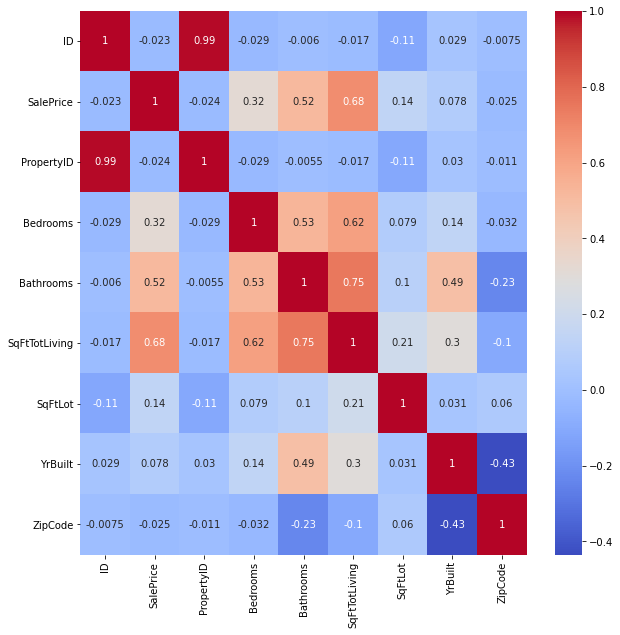

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,   vmax=1, # xticklabels=corr.columns,  yticklabels=corr.columns,
            cmap='coolwarm', annot=True, annot_kws={'size': 10})
# cmap = RdBu,  coolwarm, coolwarm_r , rocket, rocket_r, flare, flare_r
# play with color palettes here : https://seaborn.pydata.org/tutorial/color_palettes.html

## Bonus Lab : Find the most expensive zip codes
We have data from many zip codes.  
To find the most expensive zip code, let's first calculate  **price per sqft**

In [13]:
## Step 1 : calculate price per sqft
## TODO : do the math, divide  house_prices['SalePrice'] by  house_prices['SqFtTotLiving']
house_prices['price_per_sqft'] = house_prices['SalePrice'] / house_prices['SqFtTotLiving']
house_prices

,ID,Date,SalePrice,PropertyID,PropertyType,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode,price_per_sqft
0,1,9/16/14,280000,1000102,Multiplex,6,3.00,2400,9373,1991,98002,116.67
1,2,6/16/06,1000000,1200013,Single Family,4,3.75,3764,20156,2005,98166,265.67
2,3,1/29/07,745000,1200019,Single Family,4,1.75,2060,26036,1947,98166,361.65
3,4,2/25/08,425000,2800016,Single Family,5,3.75,3200,8618,1966,98168,132.81
4,5,3/29/13,240000,2800024,Single Family,4,1.75,1720,8620,1948,98168,139.53
...,...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,2,1.75,1410,1161,2011,-1,265.25
27059,27060,12/7/12,374000,9895000040,Townhouse,2,1.75,1410,1005,2011,-1,265.25
27060,27061,7/9/12,165000,9899200010,Single Family,4,1.00,1070,11170,1971,98055,154.21
27061,27062,5/26/06,315000,9900000355,Single Family,3,2.00,1345,6223,1939,98166,234.20


In [14]:
## Group data by zipcode and take the avg of price_per_sqft
zipcode_avg_price  = house_prices.groupby('ZipCode')['ZipCode', 'price_per_sqft'].mean()
zipcode_avg_price

<ipython-input-14-d690427280ba>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zipcode_avg_price  = house_prices.groupby('ZipCode')['ZipCode', 'price_per_sqft'].mean()


,ZipCode,price_per_sqft
ZipCode,,
-1,-1,235.38
9800,9800,275.00
89118,89118,92.92
98001,98001,168.25
98002,98002,181.58
...,...,...
98198,98198,191.23
98199,98199,319.44
98224,98224,119.29


In [15]:
## Sort by 'price_per_sqft'. show top-10 zipcodes
zipcode_avg_price['price_per_sqft'].nlargest(10)

ZipCode
98039   492.27
98004   412.84
98112   380.42
98102   368.58
98040   366.70
98119   357.57
98109   352.81
98105   337.18
98122   320.68
98103   319.94
Name: price_per_sqft, dtype: float64